In [3]:
import re

# ✅ Custom list of basic English stop words
stop_words = {
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him", "his",
    "himself", "she", "her", "hers", "herself", "it", "its", "itself",
    "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
    "or", "because", "as", "until", "while", "of", "at", "by", "for",
    "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then",
    "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "can", "will", "just", "don", "should", "now"
}

# ✅ Preprocessing function
def complete_preprocessing_pipeline(raw_text):
    print("=== Step 0: Raw Text ===")
    print(raw_text)
    print()

    # Step 1: Lowercase
    lower_text = raw_text.lower()
    print("=== Step 1: Lowercased ===")
    print(lower_text)
    print()

    # Step 2: Remove punctuation and numbers
    cleaned_text = re.sub(r'[^a-z\s]', '', lower_text)
    print("=== Step 2: Removed Punctuation & Numbers ===")
    print(cleaned_text)
    print()

    # Step 3: Simple whitespace tokenization
    tokens = cleaned_text.split()
    print("=== Step 3: Tokenized (Split by Space) ===")
    print(tokens)
    print()

    # Step 4: Stop word removal
    filtered_tokens = [word for word in tokens if word not in stop_words]
    print("=== Step 4: Stop Words Removed ===")
    print(filtered_tokens)
    print()

    print("=== Final Preprocessed Text ===")
    print(" ".join(filtered_tokens))


# ✅ Test it
test_text = "Hello There! My Name is John Doe, and I'm 25 years old. I love Programming in Python!! THIS IS MY TASK FOR AI LAB CAN YOU PLEASE HELP SOLVE THIS IN PYTHON CODE"
complete_preprocessing_pipeline(test_text)


=== Step 0: Raw Text ===
Hello There! My Name is John Doe, and I'm 25 years old. I love Programming in Python!! THIS IS MY TASK FOR AI LAB CAN YOU PLEASE HELP SOLVE THIS IN PYTHON CODE

=== Step 1: Lowercased ===
hello there! my name is john doe, and i'm 25 years old. i love programming in python!! this is my task for ai lab can you please help solve this in python code

=== Step 2: Removed Punctuation & Numbers ===
hello there my name is john doe and im  years old i love programming in python this is my task for ai lab can you please help solve this in python code

=== Step 3: Tokenized (Split by Space) ===
['hello', 'there', 'my', 'name', 'is', 'john', 'doe', 'and', 'im', 'years', 'old', 'i', 'love', 'programming', 'in', 'python', 'this', 'is', 'my', 'task', 'for', 'ai', 'lab', 'can', 'you', 'please', 'help', 'solve', 'this', 'in', 'python', 'code']

=== Step 4: Stop Words Removed ===
['hello', 'name', 'john', 'doe', 'im', 'years', 'old', 'love', 'programming', 'python', 'task', 'ai'

In [4]:
# ✅ Install necessary libraries
!pip install textblob vaderSentiment tabulate --quiet

# ✅ Import libraries
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tabulate import tabulate

# ✅ Function to compare sentiment analysis results
def compare_sentiment_methods(texts):
    analyzer = SentimentIntensityAnalyzer()
    results = []

    for text in texts:
        # TextBlob analysis
        tb = TextBlob(text)
        tb_polarity = tb.sentiment.polarity

        # VADER analysis
        vader_scores = analyzer.polarity_scores(text)
        vader_compound = vader_scores['compound']

        # Add result row
        results.append([
            text,
            round(tb_polarity, 3),
            "Positive" if tb_polarity > 0 else "Negative" if tb_polarity < 0 else "Neutral",
            round(vader_compound, 3),
            "Positive" if vader_compound > 0.05 else "Negative" if vader_compound < -0.05 else "Neutral"
        ])

    # Print table
    headers = ["Text", "TextBlob Polarity", "TextBlob Sentiment", "VADER Compound", "VADER Sentiment"]
    print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

    # Explain differences
    print("\n📌 Explanation of Differences:")
    print("""
- TextBlob is based on a rule-based approach using predefined lexicons and works better on well-structured English.
- VADER is tuned for social media text, emojis, slang, and works better with informal or expressive language.
- TextBlob gives one polarity score (-1 to 1), while VADER gives multiple scores and a 'compound' score used here.
- VADER handles intensifiers like "very", "extremely", or "!" better than TextBlob.
""")

# ✅ Test texts
test_texts = [
    "I absolutely love this!",
    "This is the worst thing ever.",
    "It's okay, nothing special.",
    "Amazing experience, highly recommended!",
    "Terrible service, very disappointed."
]

# ✅ Run the comparison
compare_sentiment_methods(test_texts)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
╒═════════════════════════════════════════╤═════════════════════╤══════════════════════╤══════════════════╤═══════════════════╕
│ Text                                    │   TextBlob Polarity │ TextBlob Sentiment   │   VADER Compound │ VADER Sentiment   │
╞═════════════════════════════════════════╪═════════════════════╪══════════════════════╪══════════════════╪═══════════════════╡
│ I absolutely love this!                 │               0.625 │ Positive             │            0.699 │ Positive          │
├─────────────────────────────────────────┼─────────────────────┼──────────────────────┼──────────────────┼───────────────────┤
│ This is the worst thing ever.           │              -1     │ Negative             │           -0.625 │ Negative          │
├─────────────────────────────────────────┼─────────────────────┼──────────────────────┼──────────────────┼───────────────────┤
│ It's okay, nothing spe

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📄 === Text Analysis Report ===

Original Text:
Natural Language Processing has revolutionized how we interact with technology. 
From chatbots to language translation, NLP applications are everywhere. 
Machine learning algorithms power these systems, making them more accurate and efficient. 
The future of AI depends heavily on advances in natural language understanding. 
Companies like Google, Microsoft, and OpenAI are leading this technological revolution.

Cleaned Text:
natural language processing revolutionized interact technology chatbots language translation nlp applications everywhere machine learning algorithms power systems making accurate efficient future ai depends heavily advances natural language understanding companies like google microsoft openai leading technological revolution

Top 10 Words: [('language', 3), ('natural', 2), ('processing', 1), ('revolutionized', 1), ('interact', 1), ('technology', 1), ('chatbots', 1), ('translation', 1), ('nlp', 1), ('applications', 1)]


<ipython-input-6-438e069dce69>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


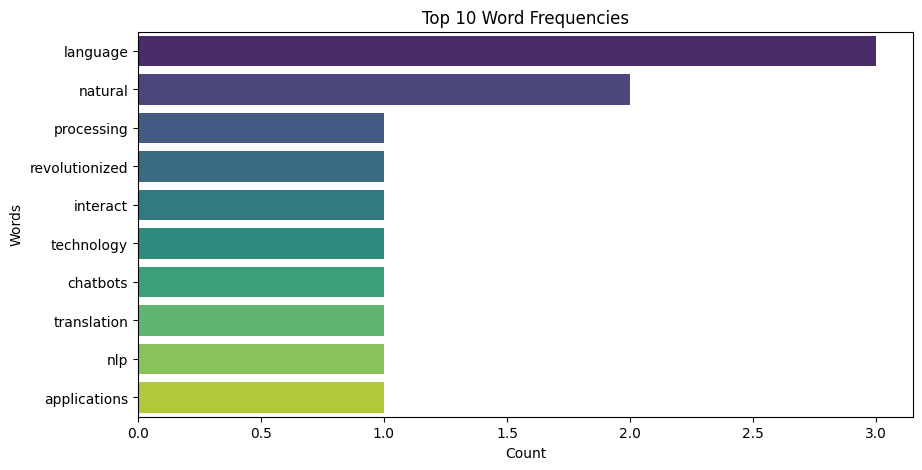

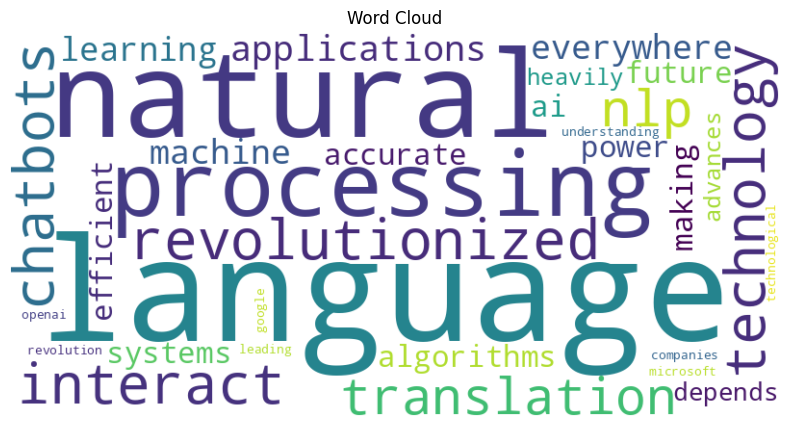

<ipython-input-6-438e069dce69>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Polarity", "Subjectivity"], y=[self.sentiment["polarity"], self.sentiment["subjectivity"]], palette="coolwarm")


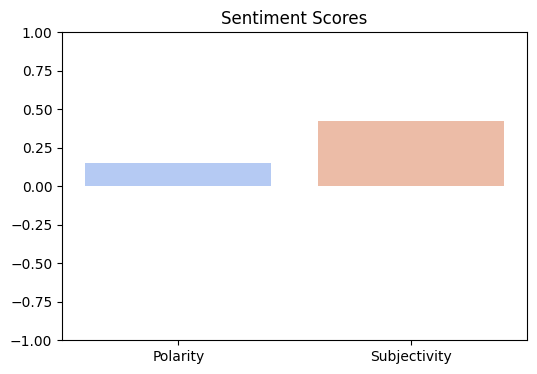

In [6]:
# ✅ Install required libraries (Colab)
!pip install nltk textblob wordcloud matplotlib seaborn --quiet

# ✅ Imports
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# ✅ Download required NLTK resources
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


# ✅ Class-based Text Analysis Dashboard
class TextAnalysisDashboard:
    def __init__(self):
        self.cleaned_text = ""
        self.tokens = []
        self.filtered_tokens = []
        self.freq_dist = {}
        self.sentiment = {}
        self.pos_tags = []
        self.original_text = ""

    def preprocess_text(self, text):
        if not text.strip():
            print("⚠️ Input text is empty. Skipping analysis.")
            return False

        self.original_text = text
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        self.tokens = text.split()
        self.filtered_tokens = [w for w in self.tokens if w not in stop_words]
        self.cleaned_text = " ".join(self.filtered_tokens)
        return True

    def analyze_text(self, text):
        if not self.preprocess_text(text):
            return

        # Frequency analysis
        self.freq_dist = Counter(self.filtered_tokens)

        # Sentiment analysis
        blob = TextBlob(text)
        self.sentiment = {
            "polarity": round(blob.sentiment.polarity, 3),
            "subjectivity": round(blob.sentiment.subjectivity, 3)
        }

        # POS tagging
        self.pos_tags = nltk.pos_tag(self.filtered_tokens)

    def generate_report(self):
        if not self.cleaned_text:
            print("⚠️ No analysis to report.")
            return

        print("📄 === Text Analysis Report ===\n")
        print(f"Original Text:\n{self.original_text.strip()}\n")
        print(f"Cleaned Text:\n{self.cleaned_text}\n")
        print(f"Top 10 Words: {self.freq_dist.most_common(10)}\n")
        print(f"Sentiment Polarity: {self.sentiment['polarity']}")
        print(f"Sentiment Subjectivity: {self.sentiment['subjectivity']}\n")

        pos_summary = Counter(tag for word, tag in self.pos_tags)
        print("POS Tagging Summary:")
        for tag, count in pos_summary.items():
            print(f"  {tag}: {count}")

    def create_visualizations(self):
        if not self.cleaned_text:
            print("⚠️ No visualizations to display.")
            return

        # Word Frequency Plot
        plt.figure(figsize=(10, 5))
        top_words = self.freq_dist.most_common(10)
        words, counts = zip(*top_words)
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.title("Top 10 Word Frequencies")
        plt.xlabel("Count")
        plt.ylabel("Words")
        plt.show()

        # Word Cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(self.cleaned_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title("Word Cloud")
        plt.show()

        # Sentiment Plot
        plt.figure(figsize=(6, 4))
        sns.barplot(x=["Polarity", "Subjectivity"], y=[self.sentiment["polarity"], self.sentiment["subjectivity"]], palette="coolwarm")
        plt.title("Sentiment Scores")
        plt.ylim(-1, 1)
        plt.show()


# ✅ Test the dashboard
sample_analysis_text = """
Natural Language Processing has revolutionized how we interact with technology.
From chatbots to language translation, NLP applications are everywhere.
Machine learning algorithms power these systems, making them more accurate and efficient.
The future of AI depends heavily on advances in natural language understanding.
Companies like Google, Microsoft, and OpenAI are leading this technological revolution.
"""

# Run the dashboard
dashboard = TextAnalysisDashboard()
dashboard.analyze_text(sample_analysis_text)
dashboard.generate_report()
dashboard.create_visualizations()


In [7]:
!pip install spacy --quiet
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
import spacy

# ✅ Load spaCy English model
nlp = spacy.load("en_core_web_sm")

class NERAndClassifier:
    def __init__(self):
        self.categories = {
            "Technology": ["AI", "machine learning", "software", "app", "device", "technology", "Python", "iPhone", "data"],
            "Health": ["exercise", "diet", "health", "cardiovascular", "nutrition", "doctor", "medication", "mental"],
            "Sports": ["match", "team", "goal", "tournament", "football", "basketball", "World Cup", "cricket", "game"]
        }

    def extract_entities(self, text):
        doc = nlp(text)
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        return entities

    def classify_text(self, text):
        text_lower = text.lower()
        scores = {category: 0 for category in self.categories}

        for category, keywords in self.categories.items():
            for keyword in keywords:
                if keyword.lower() in text_lower:
                    scores[category] += 1

        best_category = max(scores, key=scores.get)
        confidence = scores[best_category] / (sum(scores.values()) + 1e-5)  # Avoid division by zero

        return best_category, round(confidence, 2), scores

    def comprehensive_analysis(self, text):
        print("📄 Original Text:")
        print(text)
        print("\n🧠 Named Entity Recognition:")
        entities = self.extract_entities(text)
        if entities:
            for ent, label in entities:
                print(f" - {ent} ({label})")
        else:
            print(" - No entities found.")

        print("\n📊 Classification:")
        category, confidence, scores = self.classify_text(text)
        print(f"Predicted Category: {category}")
        print(f"Confidence Score: {confidence}")
        print("Category Scores:")
        for cat, score in scores.items():
            print(f"  - {cat}: {score}")
        print("\n" + "="*50 + "\n")

# ✅ Test cases
test_classification_texts = [
    "The latest iPhone features advanced machine learning capabilities and improved camera technology.",
    "Regular exercise and a balanced diet are essential for maintaining good cardiovascular health.",
    "The World Cup final was an exciting match with incredible goals scored by both teams."
]

analyzer = NERAndClassifier()
for text in test_classification_texts:
    analyzer.comprehensive_analysis(text)


📄 Original Text:
The latest iPhone features advanced machine learning capabilities and improved camera technology.

🧠 Named Entity Recognition:
 - No entities found.

📊 Classification:
Predicted Category: Technology
Confidence Score: 1.0
Category Scores:
  - Technology: 3
  - Health: 0
  - Sports: 0


📄 Original Text:
Regular exercise and a balanced diet are essential for maintaining good cardiovascular health.

🧠 Named Entity Recognition:
 - No entities found.

📊 Classification:
Predicted Category: Health
Confidence Score: 0.8
Category Scores:
  - Technology: 1
  - Health: 4
  - Sports: 0


📄 Original Text:
The World Cup final was an exciting match with incredible goals scored by both teams.

🧠 Named Entity Recognition:
 - The World Cup (EVENT)

📊 Classification:
Predicted Category: Sports
Confidence Score: 1.0
Category Scores:
  - Technology: 0
  - Health: 0
  - Sports: 4


